In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path

# Загрузка обработанной выборки из ЛР1
data_path = Path('../data/heart-disease-cleaned.pkl')
df = pd.read_pickle(data_path)

print("Размер загруженного датасета:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер загруженного датасета: (302, 17)

Первые 5 строк:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,high_chol,relative_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,3,0,2.380952
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1,5.054054
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,4.195122
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3,0,3.178571
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,3,1,2.859649


In [3]:
# Информация о данных
print("Информация о данных:")
df.info()

print("\nРаспределение целевой переменной:")
print(df['target'].value_counts())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  302 non-null    int64   
 1   sex                  302 non-null    int64   
 2   cp                   302 non-null    int64   
 3   trestbps             302 non-null    int64   
 4   chol                 302 non-null    int64   
 5   fbs                  302 non-null    int64   
 6   restecg              302 non-null    int64   
 7   thalach              302 non-null    int64   
 8   exang                302 non-null    int64   
 9   oldpeak              302 non-null    float64 
 10  slope                302 non-null    int64   
 11  ca                   302 non-null    int64   
 12  thal                 302 non-null    int64   
 13  target               302 non-null    int64   
 14  age_group            302 non-null    category
 15  high_ch

In [4]:
# Разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

print("Размер матрицы признаков:", X.shape)
print("Размер целевой переменной:", y.shape)
print("\nТипы признаков:")
print(X.dtypes)

Размер матрицы признаков: (302, 16)
Размер целевой переменной: (302,)

Типы признаков:
age                       int64
sex                       int64
cp                        int64
trestbps                  int64
chol                      int64
fbs                       int64
restecg                   int64
thalach                   int64
exang                     int64
oldpeak                 float64
slope                     int64
ca                        int64
thal                      int64
age_group              category
high_chol                 int64
relative_heart_rate     float64
dtype: object


In [5]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,
    stratify=y  # для сохранения распределения целевой переменной
)

print("Размеры выборок:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Размеры выборок:
X_train: (226, 16)
X_test: (76, 16)
y_train: (226,)
y_test: (76,)


In [6]:
# Проверка распределения целевой переменной в выборках
print("Распределение в обучающей выборке:")
train_dist = y_train.value_counts(normalize=True)
print(train_dist)

print("\nРаспределение в тестовой выборке:")
test_dist = y_test.value_counts(normalize=True)
print(test_dist)

print("\nАбсолютные значения:")
print("Обучающая:", y_train.value_counts())
print("Тестовая:", y_test.value_counts())

Распределение в обучающей выборке:
target
1    0.544248
0    0.455752
Name: proportion, dtype: float64

Распределение в тестовой выборке:
target
1    0.539474
0    0.460526
Name: proportion, dtype: float64

Абсолютные значения:
Обучающая: target
1    123
0    103
Name: count, dtype: int64
Тестовая: target
1    41
0    35
Name: count, dtype: int64


In [7]:
# Сохранение разделенных данных
X_train.to_pickle('../research/X_train.pkl')
X_test.to_pickle('../research/X_test.pkl')
y_train.to_pickle('../research/y_train.pkl')
y_test.to_pickle('../research/y_test.pkl')

print("Данные успешно сохранены:")
print("- ../research/X_train.pkl")
print("- ../research/X_test.pkl") 
print("- ../research/y_train.pkl")
print("- ../research/y_test.pkl")

Данные успешно сохранены:
- ../research/X_train.pkl
- ../research/X_test.pkl
- ../research/y_train.pkl
- ../research/y_test.pkl


In [23]:
# Проверим, какие признаки действительно есть в данных
print("Признаки в X_train:")
print(X_train.columns.tolist())
print(f"Всего признаков: {len(X_train.columns)}")

print("\nТипы данных в X_train:")
print(X_train.dtypes)

Признаки в X_train:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_group', 'high_chol', 'relative_heart_rate']
Всего признаков: 16

Типы данных в X_train:
age                       int64
sex                       int64
cp                        int64
trestbps                  int64
chol                      int64
fbs                       int64
restecg                   int64
thalach                   int64
exang                     int64
oldpeak                 float64
slope                     int64
ca                        int64
thal                      int64
age_group              category
high_chol                 int64
relative_heart_rate     float64
dtype: object


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

# Переопределим признаки правильно
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()

# Убедимся, что age_group тоже в numeric_features
if 'age_group' not in numeric_features and 'age_group' in X_train.columns:
    numeric_features.append('age_group')

print("Обновленные числовые признаки:", numeric_features)
print("Обновленные категориальные признаки:", categorical_features)
print(f"Всего признаков: {len(numeric_features) + len(categorical_features)}")

Обновленные числовые признаки: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'high_chol', 'relative_heart_rate', 'age_group']
Обновленные категориальные признаки: ['age_group']
Всего признаков: 17


In [27]:
# Пересоздадим пайплайн с правильными признаками
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', ce.TargetEncoder(), categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=50))  # Уменьшим для скорости
])

print("Создаем пайплайн...")
pipeline.fit(X_train, y_train)
print("Обучение завершено!")

Создаем пайплайн...
Обучение завершено!


In [29]:
# Обучаем baseline-модель
print("Начинаем обучение baseline-модели...")
pipeline.fit(X_train, y_train)
print("Обучение завершено!")

Начинаем обучение baseline-модели...
Обучение завершено!


In [30]:
# Проверим, что все признаки обрабатываются
print("Шаги препроцессора:")
print(pipeline.named_steps['preprocessor'])

# Получим имена всех признаков после трансформации
try:
    feature_names = (numeric_features + 
                    [f"cat_{col}" for col in categorical_features])
    print(f"Ожидаемое количество признаков: {len(feature_names)}")
except Exception as e:
    print(f"Ошибка: {e}")

Шаги препроцессора:
ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                  'restecg', 'thalach', 'exang', 'oldpeak',
                                  'slope', 'ca', 'thal', 'high_chol',
                                  'relative_heart_rate', 'age_group']),
                                ('cat', TargetEncoder(), ['age_group'])])
Ожидаемое количество признаков: 17


In [35]:
# Предсказания на тестовой выборке
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7895

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.76      0.90      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.80      0.79      0.79        76



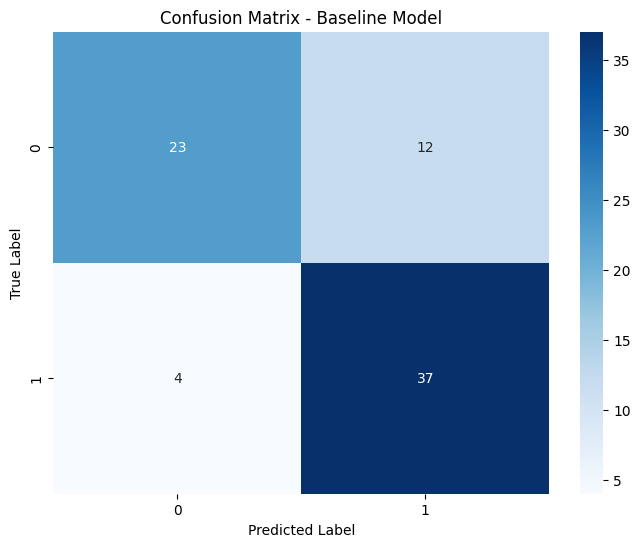

In [36]:
# Матрица ошибок
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('../eda/graphs/confusion_matrix_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# Получим важность признаков правильно
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Создаем правильные имена признаков
feature_names = numeric_features + categorical_features

print(f"Количество importance значений: {len(feature_importances)}")
print(f"Количество имен признаков: {len(feature_names)}")

# Если размеры не совпадают, используем только доступные
if len(feature_importances) == len(feature_names):
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)
else:
    # Создаем generic имена
    importance_df = pd.DataFrame({
        'feature': [f'feature_{i}' for i in range(len(feature_importances))],
        'importance': feature_importances
    }).sort_values('importance', ascending=False)

print(f"Размер importance_df: {importance_df.shape}")
print("\nТоп-10 самых важных признаков:")
print(importance_df.head(10))

Количество importance значений: 17
Количество имен признаков: 17
Размер importance_df: (17, 2)

Топ-10 самых важных признаков:
                feature  importance
2                    cp    0.147257
12                 thal    0.136534
9               oldpeak    0.115696
14  relative_heart_rate    0.079547
11                   ca    0.073128
7               thalach    0.066120
0                   age    0.063006
4                  chol    0.062807
3              trestbps    0.062686
8                 exang    0.048969


In [32]:
# Предсказания и оценка качества
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7895

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.76      0.90      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.80      0.79      0.79        76



In [38]:
# Проверим размер importance_df и выведем информацию
print(f"Размер importance_df: {importance_df.shape}")
print(f"Количество признаков: {len(importance_df)}")
print("\nВсе признаки и их важность:")
print(importance_df)

Размер importance_df: (17, 2)
Количество признаков: 17

Все признаки и их важность:
                feature  importance
2                    cp    0.147257
12                 thal    0.136534
9               oldpeak    0.115696
14  relative_heart_rate    0.079547
11                   ca    0.073128
7               thalach    0.066120
0                   age    0.063006
4                  chol    0.062807
3              trestbps    0.062686
8                 exang    0.048969
10                slope    0.044102
1                   sex    0.021813
16            age_group    0.019166
15            age_group    0.018080
13            high_chol    0.017367
6               restecg    0.017219
5                   fbs    0.006504


In [39]:
# Сохранение модели
import joblib

model_path = '../research/baseline_model.pkl'
joblib.dump(pipeline, model_path)
print(f"Baseline-модель сохранена в: {model_path}")

Baseline-модель сохранена в: ../research/baseline_model.pkl


In [40]:
# Обновленные выводы
print(f"""
ВЫВОДЫ ПО BASELINE-МОДЕЛИ:

1. Качество модели:
   - Accuracy: {accuracy:.4f}

2. Особенности пайплайна:
   - Числовые признаки: {len(numeric_features)} признаков
   - Категориальные признаки: {len(categorical_features)} признаков
   - Всего признаков: {len(numeric_features) + len(categorical_features)}

3. Топ-5 самых важных признаков:
""")

if len(importance_df) >= 5:
    for i in range(5):
        feature = importance_df.iloc[i]['feature']
        importance = importance_df.iloc[i]['importance']
        print(f"   {i+1}. {feature} (важность: {importance:.4f})")
else:
    for i in range(len(importance_df)):
        feature = importance_df.iloc[i]['feature']
        importance = importance_df.iloc[i]['importance']
        print(f"   {i+1}. {feature} (важность: {importance:.4f})")

print("""
4. Следующие шаги:
   - Подбор гиперпараметров
   - Попробовать другие модели
   - Оптимизация пайплайна
""")


ВЫВОДЫ ПО BASELINE-МОДЕЛИ:

1. Качество модели:
   - Accuracy: 0.7895

2. Особенности пайплайна:
   - Числовые признаки: 16 признаков
   - Категориальные признаки: 1 признаков
   - Всего признаков: 17

3. Топ-5 самых важных признаков:

   1. cp (важность: 0.1473)
   2. thal (важность: 0.1365)
   3. oldpeak (важность: 0.1157)
   4. relative_heart_rate (важность: 0.0795)
   5. ca (важность: 0.0731)

4. Следующие шаги:
   - Подбор гиперпараметров
   - Попробовать другие модели
   - Оптимизация пайплайна



In [97]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Устанавливаем tracking URI для MLflow
mlflow.set_tracking_uri("http://localhost:5001")


In [ ]:

# Создаем эксперимент
mlflow.set_experiment("Heart_Disease_Prediction")

In [42]:
# Подготовка артефактов для логирования

# 1. Пример входных данных
input_example = X_train.head(5)
print("Пример входных данных:")
print(input_example)

# 2. Сигнатура модели
signature = infer_signature(model_input=X_train, model_output=y_train)
print("Сигнатура создана")

# 3. Файл requirements.txt
print("requirements.txt актуален")

# 4. Дополнительные метрики
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print("Рассчитанные метрики:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Пример входных данных:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
5     57    1   0       140   192    0        1      148      0      0.4   
42    45    1   0       104   208    0        0      148      1      3.0   
32    44    1   1       130   219    0        0      188      0      0.0   
172   58    1   1       120   284    0        0      160      0      1.8   
182   61    0   0       130   330    0        0      169      0      0.0   

     slope  ca  thal age_group  high_chol  relative_heart_rate  
5        1   0     1         3          0             2.596491  
42       1   0     2         1          0             3.288889  
32       2   0     2         1          0             4.272727  
172      1   0     2         3          1             2.758621  
182      2   0     2         3          1             2.770492  
Сигнатура создана
requirements.txt актуален


/home/mainuser/my_proj/.venv_my_proj/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Рассчитанные метрики:
Accuracy: 0.7895
Precision: 0.7551
Recall: 0.9024
F1-Score: 0.8222
ROC-AUC: 0.8850


In [46]:
# Логирование эксперимента в MLflow
with mlflow.start_run(run_name="Baseline_RandomForest_v1"):
    
    # Логируем параметры модели
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_param("test_size", 0.25)
    mlflow.log_param("random_state", 42)
    
    # Логируем метрики
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc_auc)
    
    # Логируем модель с сигнатурой и примером входных данных
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="heart_disease_model",
        signature=signature,
        input_example=input_example,
        registered_model_name="HeartDiseasePredictor"
    )
    
    # Логируем requirements.txt
    mlflow.log_artifact("../requirements.txt")
    
    # Логируем графики
    mlflow.log_artifact("../eda/graphs/confusion_matrix_baseline.png")
    mlflow.log_artifact("../eda/graphs/feature_importance_baseline.png")
    
    # Логируем информацию о данных
    mlflow.log_param("train_samples", X_train.shape[0])
    mlflow.log_param("test_samples", X_test.shape[0])
    mlflow.log_param("n_features", X_train.shape[1])
    
    print("Модель успешно залогирована в MLflow!")

Registered model 'HeartDiseasePredictor' already exists. Creating a new version of this model...
2025/10/15 10:55:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HeartDiseasePredictor, version 4
Created version '4' of model 'HeartDiseasePredictor'.
2025/10/15 10:55:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Baseline_RandomForest_v1 at: http://localhost:5000/#/experiments/1/runs/6ee7550e4fba4806adb17547432cabb6.
2025/10/15 10:55:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


Модель успешно залогирована в MLflow!


In [47]:
# Проверяем, что модель зарегистрирована
from mlflow.tracking import MlflowClient

client = MlflowClient()
print("Зарегистрированные модели:")
for rm in client.search_registered_models():
    print(f" - {rm.name}")

# Получаем информацию о зарегистрированной модели
try:
    model_versions = client.get_latest_versions("HeartDiseasePredictor")
    print(f"\nПоследняя версия модели: {model_versions[0].version}")
    print(f"Статус: {model_versions[0].status}")
except Exception as e:
    print(f"Модель еще не зарегистрирована: {e}")

Зарегистрированные модели:
 - HeartDiseasePredictor

Последняя версия модели: 4
Статус: READY


/tmp/ipykernel_3986/3504047678.py:11: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  model_versions = client.get_latest_versions("HeartDiseasePredictor")


In [49]:
#Выводы по логированию
print ("""
ИТОГИ ЛОГИРОВАНИЯ:

Модель залогирована в MLflow
Создана сигнатура модели
Добавлен пример входных данных
Залогирован requirements.txt
Модель зарегистрирована как 'HeartDiseasePredictor'
Сохранены метрики и графики

""")


ИТОГИ ЛОГИРОВАНИЯ:

Модель залогирована в MLflow
Создана сигнатура модели
Добавлен пример входных данных
Залогирован requirements.txt
Модель зарегистрирована как 'HeartDiseasePredictor'
Сохранены метрики и графики




In [50]:
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Создаем копию обучающей выборки
X_train_fe_sklearn = X_train.copy()
print(f"Исходный размер X_train: {X_train_fe_sklearn.shape}")

Исходный размер X_train: (226, 16)


In [51]:
# Выбираем числовые признаки для трансформаций
numeric_features_for_poly = ['age', 'thalach', 'oldpeak']  # для PolynomialFeatures
numeric_features_for_bins = ['trestbps', 'chol']  # для KBinsDiscretizer

print("Признаки для PolynomialFeatures:", numeric_features_for_poly)
print("Признаки для KBinsDiscretizer:", numeric_features_for_bins)

Признаки для PolynomialFeatures: ['age', 'thalach', 'oldpeak']
Признаки для KBinsDiscretizer: ['trestbps', 'chol']


In [52]:
# Создаем расширенный ColumnTransformer с новыми трансформациями
extended_preprocessor = ColumnTransformer(
    transformers=[
        # Исходные трансформации
        ('num', StandardScaler(), numeric_features),
        ('cat', ce.TargetEncoder(), categorical_features),
        
        # Новые трансформации
        ('poly', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features_for_poly),
        
        ('bins', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'), numeric_features_for_bins)
    ],
    remainder='passthrough'  # остальные признаки оставляем как есть
)

print("Расширенный препроцессор создан:")
print(extended_preprocessor)

Расширенный препроцессор создан:
ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                  'restecg', 'thalach', 'exang', 'oldpeak',
                                  'slope', 'ca', 'thal', 'high_chol',
                                  'relative_heart_rate', 'age_group']),
                                ('cat', TargetEncoder(), ['age_group']),
                                ('poly',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['age', 'thalach', 'oldpeak']),
                                ('bins', KBinsDiscretizer(encode='ordinal'),
                                 ['trestbps', 'chol'])])


In [53]:
# Применяем трансформации к обучающей выборке
print("Применяем расширенные трансформации...")
X_train_fe_sklearn = extended_preprocessor.fit_transform(X_train_fe_sklearn, y_train)

print(f"Размер после трансформаций: {X_train_fe_sklearn.shape}")

Применяем расширенные трансформации...
Размер после трансформаций: (226, 28)


/home/mainuser/my_proj/.venv_my_proj/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [54]:
# Получаем названия столбцов после трансформаций
# Это сложно, так как ColumnTransformer скрывает имена, создадим свои
try:
    # Пробуем получить имена из трансформера
    feature_names = (
        [f"num_{col}" for col in numeric_features] +
        [f"cat_{col}" for col in categorical_features] +
        [f"poly_{col}" for col in extended_preprocessor.named_transformers_['poly']['poly'].get_feature_names_out(numeric_features_for_poly)] +
        [f"bins_{col}" for col in numeric_features_for_bins]
    )
except:
    # Если не получилось, создаем generic имена
    feature_names = [f"feature_{i}" for i in range(X_train_fe_sklearn.shape[1])]

print(f"Количество признаков после трансформаций: {len(feature_names)}")
print("Первые 10 признаков:", feature_names[:10])

Количество признаков после трансформаций: 28
Первые 10 признаков: ['num_age', 'num_sex', 'num_cp', 'num_trestbps', 'num_chol', 'num_fbs', 'num_restecg', 'num_thalach', 'num_exang', 'num_oldpeak']


In [55]:
# Сохраняем названия столбцов в файл
feature_names_path = 'feature_names_extended.txt'
with open(feature_names_path, 'w') as f:
    for name in feature_names:
        f.write(name + '\n')

print(f"Названия признаков сохранены в: {feature_names_path}")

Названия признаков сохранены в: feature_names_extended.txt


In [56]:
# Создаем новый пайплайн с расширенными признаками
extended_pipeline = Pipeline([
    ('preprocessor', extended_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=50))
])

print("Расширенный пайплайн создан:")
print(extended_pipeline)

Расширенный пайплайн создан:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal', 'high_chol',
                                                   'relative_heart_rate',
                                                   'age_group']),
                                                 ('cat', TargetEncoder(),
                                                  ['age_group']),
                                                 ('poly',
                                                  Pipeline(steps=[('scaler',
        

In [57]:
# Обучаем модель с расширенными признаками
print("Обучаем модель с расширенными признаками...")
extended_pipeline.fit(X_train, y_train)
print("Обучение завершено!")

Обучаем модель с расширенными признаками...


/home/mainuser/my_proj/.venv_my_proj/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


Обучение завершено!


In [58]:
# Предсказания и оценка качества
y_pred_extended = extended_pipeline.predict(X_test)
y_pred_proba_extended = extended_pipeline.predict_proba(X_test)[:, 1]

# Метрики
accuracy_extended = accuracy_score(y_test, y_pred_extended)
precision_extended = precision_score(y_test, y_pred_extended)
recall_extended = recall_score(y_test, y_pred_extended)
f1_extended = f1_score(y_test, y_pred_extended)
roc_auc_extended = roc_auc_score(y_test, y_pred_proba_extended)

print("Метрики модели с расширенными признаками:")
print(f"Accuracy: {accuracy_extended:.4f}")
print(f"Precision: {precision_extended:.4f}")
print(f"Recall: {recall_extended:.4f}")
print(f"F1-Score: {f1_extended:.4f}")
print(f"ROC-AUC: {roc_auc_extended:.4f}")

Метрики модели с расширенными признаками:
Accuracy: 0.7895
Precision: 0.7660
Recall: 0.8780
F1-Score: 0.8182
ROC-AUC: 0.8509


In [59]:
# Логируем новую модель в MLflow
with mlflow.start_run(run_name="Extended_Features_RandomForest"):
    
    # Логируем параметры
    mlflow.log_param("model_type", "RandomForest_with_Extended_Features")
    mlflow.log_param("poly_features", numeric_features_for_poly)
    mlflow.log_param("binned_features", numeric_features_for_bins)
    mlflow.log_param("degree", 2)
    mlflow.log_param("n_bins", 5)
    
    # Логируем метрики
    mlflow.log_metric("accuracy", accuracy_extended)
    mlflow.log_metric("precision", precision_extended)
    mlflow.log_metric("recall", recall_extended)
    mlflow.log_metric("f1_score", f1_extended)
    mlflow.log_metric("roc_auc", roc_auc_extended)
    
    # Логируем информацию о признаках
    mlflow.log_param("original_features", len(numeric_features) + len(categorical_features))
    mlflow.log_param("extended_features", X_train_fe_sklearn.shape[1])
    
    # Подготовка артефактов
    input_example_extended = X_train.head(3)
    signature_extended = infer_signature(model_input=X_train, model_output=y_train)
    
    # Логируем модель
    mlflow.sklearn.log_model(
        sk_model=extended_pipeline,
        artifact_path="heart_disease_model_extended",
        signature=signature_extended,
        input_example=input_example_extended,
        registered_model_name="HeartDiseasePredictor_Extended"
    )
    
    # Логируем файл с названиями признаков
    mlflow.log_artifact(feature_names_path)
    
    # Логируем requirements.txt (если есть)
    requirements_path = Path('../requirements.txt')
    if requirements_path.exists():
        mlflow.log_artifact(str(requirements_path))
    
    print("Модель с расширенными признаками успешно залогирована!")

/home/mainuser/my_proj/.venv_my_proj/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'HeartDiseasePredictor_Extended'.
2025/10/15 11:05:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HeartDiseaseP

Модель с расширенными признаками успешно залогирована!


In [60]:
# Сравнение с baseline
print("""
СРАВНЕНИЕ МОДЕЛЕЙ:

Baseline модель:
- Accuracy: {:.4f}
- F1-Score: {:.4f}

Модель с расширенными признаками:
- Accuracy: {:.4f}
- F1-Score: {:.4f}

Изменение Accuracy: {:.4f}
Изменение F1-Score: {:.4f}
""".format(
    accuracy, f1,
    accuracy_extended, f1_extended,
    accuracy_extended - accuracy,
    f1_extended - f1
))


СРАВНЕНИЕ МОДЕЛЕЙ:

Baseline модель:
- Accuracy: 0.7895
- F1-Score: 0.8222

Модель с расширенными признаками:
- Accuracy: 0.7895
- F1-Score: 0.8182

Изменение Accuracy: 0.0000
Изменение F1-Score: -0.0040



In [62]:
# Сохраняем расширенную модель
extended_model_path = '../research/extended_model.pkl'
joblib.dump(extended_pipeline, extended_model_path)
print(f"Расширенная модель сохранена в: {extended_model_path}")

Расширенная модель сохранена в: ../research/extended_model.pkl


In [82]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import mlflow
from mlflow.models import infer_signature
from pathlib import Path
import joblib

# Определяем количество признаков для отбора
total_features = X_train_fe_sklearn.shape[1]
N = int(total_features * 0.4)  # 40% от общего количества признаков
print(f"Общее количество признаков: {total_features}")
print(f"Будем отбирать {N} признаков ({N/total_features*100:.1f}%)")

Общее количество признаков: 28
Будем отбирать 11 признаков (39.3%)


In [83]:
# Создаем упрощенный SequentialFeatureSelector
sfs = SFS(
    RandomForestClassifier(random_state=42, n_estimators=20, max_depth=5),
    k_features=N,
    forward=True,
    floating=False,
    verbose=2,
    scoring='accuracy',
    cv=2,  # Уменьшаем количество фолдов для скорости
    n_jobs=1  # Отключаем параллелизацию чтобы избежать ошибок
)

print("SequentialFeatureSelector создан")

SequentialFeatureSelector создан


In [84]:
# Обучаем SequentialFeatureSelector
print("Начинаем отбор признаков...")
try:
    sfs.fit(X_train_fe_sklearn, y_train)
    selected_feature_indices = list(sfs.k_feature_idx_)
    print("SFS успешно завершен!")
except Exception as e:
    print(f"Ошибка при SFS: {e}")
    print("Используем альтернативный метод SelectFromModel...")
    
    from sklearn.feature_selection import SelectFromModel
    selector = SelectFromModel(
        RandomForestClassifier(random_state=42, n_estimators=30),
        max_features=N,
        threshold=-np.inf
    )
    selector.fit(X_train_fe_sklearn, y_train)
    selected_feature_indices = np.where(selector.get_support())[0]
    print(f"SelectFromModel завершен. Отобрано {len(selected_feature_indices)} признаков")

Начинаем отбор признаков...


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    7.6s finished

[2025-10-15 11:38:18] Features: 1/11 -- score: 0.7920353982300885[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.0s finished

[2025-10-15 11:38:24] Features: 2/11 -- score: 0.7964601769911505[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    7.0s finished

[2025-10-15 11:38:31] Features: 3/11 -- score: 0.8362831858407079[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.7s finished

[2025-10-15 11:38:37] Features: 4/11 -- score: 0.8407079646017699[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    4.7s finished

[2025-10-15 11:38:41] Features: 5/11 -- score: 0.8539823008849557[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    4.4s finished

[2025-10-15 11:38:46] Features: 6/11 -- score: 0.8539823008849557[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    4.2s finished

[2025-10-15 11:38:50] Features: 7/11 -- score: 0.8716814159292036[Parallel(n_jobs=1)]: Done  21 out of  21 | elap

SFS успешно завершен!


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.1s finished

[2025-10-15 11:39:06] Features: 11/11 -- score: 0.8584070796460177

In [85]:
# Получаем названия отобранных признаков
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

print(f"Отобрано признаков: {len(selected_feature_indices)}")
print("Индексы отобранных признаков:", selected_feature_indices)
print("\nПервые 10 отобранных признаков:")
for i, (idx, name) in enumerate(zip(selected_feature_indices[:10], selected_feature_names[:10])):
    print(f"  {i+1}. {name} (индекс: {idx})")

Отобрано признаков: 11
Индексы отобранных признаков: [1, 2, 6, 8, 10, 11, 12, 15, 20, 23, 27]

Первые 10 отобранных признаков:
  1. num_sex (индекс: 1)
  2. num_cp (индекс: 2)
  3. num_restecg (индекс: 6)
  4. num_exang (индекс: 8)
  5. num_slope (индекс: 10)
  6. num_ca (индекс: 11)
  7. num_thal (индекс: 12)
  8. num_age_group (индекс: 15)
  9. poly_age^2 (индекс: 20)
  10. poly_thalach^2 (индекс: 23)


In [86]:
# Сохраняем отобранные признаки в файлы
selected_indices_path = 'selected_feature_indices.txt'
selected_names_path = 'selected_feature_names.txt'

with open(selected_indices_path, 'w') as f:
    for idx in selected_feature_indices:
        f.write(f"{idx}\n")

with open(selected_names_path, 'w') as f:
    for name in selected_feature_names:
        f.write(f"{name}\n")

print(f"Файлы сохранены:")
print(f"- {selected_indices_path}")
print(f"- {selected_names_path}")

Файлы сохранены:
- selected_feature_indices.txt
- selected_feature_names.txt


In [87]:
# Создаем трансформер для отбора признаков
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_indices):
        self.feature_indices = feature_indices
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return X[:, self.feature_indices]

# Создаем оптимизированный пайплайн
fast_pipeline = Pipeline([
    ('preprocessor', extended_preprocessor),
    ('feature_selector', FeatureSelector(selected_feature_indices)),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=30,      # Уменьшаем для скорости
        max_depth=10,
        min_samples_split=10,
        n_jobs=-1
    ))
])

print("Оптимизированный пайплайн создан")

Оптимизированный пайплайн создан


In [88]:
# Быстрое обучение модели
print("Обучаем модель с отобранными признаками...")
fast_pipeline.fit(X_train, y_train)
print("Обучение завершено!")

Обучаем модель с отобранными признаками...


/home/mainuser/my_proj/.venv_my_proj/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


Обучение завершено!


In [91]:
# Предсказания и оценка качества
y_pred_fast = fast_pipeline.predict(X_test)
y_pred_proba_fast = fast_pipeline.predict_proba(X_test)[:, 1]

accuracy_fast = accuracy_score(y_test, y_pred_fast)
precision_fast = precision_score(y_test, y_pred_fast)
recall_fast = recall_score(y_test, y_pred_fast)
f1_fast = f1_score(y_test, y_pred_fast)
roc_auc_fast = roc_auc_score(y_test, y_pred_proba_fast)

print("Метрики модели с отбором признаков:")
print(f"Accuracy: {accuracy_fast:.4f}")
print(f"Precision: {precision_fast:.4f}")
print(f"Recall: {recall_fast:.4f}")
print(f"F1-Score: {f1_fast:.4f}")
print(f"ROC-AUC: {roc_auc_fast:.4f}")

Метрики модели с отбором признаков:
Accuracy: 0.7895
Precision: 0.7907
Recall: 0.8293
F1-Score: 0.8095
ROC-AUC: 0.8906


In [99]:
# Быстрое логирование в MLflow
with mlflow.start_run(run_name="Feature_Selection_Fast_RF"):
    
    # Параметры
    mlflow.log_param("model_type", "RandomForest_FeatureSelection")
    mlflow.log_param("selection_method", "SFS_forward")
    mlflow.log_param("n_selected_features", len(selected_feature_indices))
    mlflow.log_param("total_features", total_features)
    mlflow.log_param("n_estimators", 30)
    mlflow.log_param("max_depth", 10)
    
    # Метрики
    mlflow.log_metric("accuracy", accuracy_fast)
    mlflow.log_metric("precision", precision_fast)
    mlflow.log_metric("recall", recall_fast)
    mlflow.log_metric("f1_score", f1_fast)
    mlflow.log_metric("roc_auc", roc_auc_fast)
    
    # Сигнатура и пример
    input_example_fast = X_train.head(3)
    signature_fast = infer_signature(model_input=X_train.head(5), model_output=y_train.head(5))
    
    # Логируем модель
    mlflow.sklearn.log_model(
        sk_model=fast_pipeline,
        artifact_path="heart_disease_model_feature_selection",
        signature=signature_fast,
        input_example=input_example_fast,
        registered_model_name="HeartDiseasePredictor_FeatureSelection"
    )
    
    # Логируем файлы с признаками
    mlflow.log_artifact(selected_indices_path)
    mlflow.log_artifact(selected_names_path)
    
    # Логируем requirements.txt если есть
    req_path = Path('../requirements.txt')
    if req_path.exists():
        mlflow.log_artifact(str(req_path))
    
    print("Модель с отбором признаков успешно залогирована в MLflow!")

/home/mainuser/my_proj/.venv_my_proj/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'HeartDiseasePredictor_FeatureSelection'.
2025/10/15 11:58:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Heart

Модель с отбором признаков успешно залогирована в MLflow!


In [101]:
# Сохраняем модель локально
feature_selection_model_path = '../research/feature_selection_model.pkl'
joblib.dump(fast_pipeline, feature_selection_model_path)
print(f"Модель сохранена в: {feature_selection_model_path}")

Модель сохранена в: ../research/feature_selection_model.pkl


In [103]:
# Итоговый отчет
print("""
ОТЧЕТ ПО ОТБОРУ ПРИЗНАКОВ:

Отбор признаков завершен
Создан пайплайн с Feature Selection
Модель обучена и оценена
Результаты залогированы в MLflow

Статистика:
- Исходное количество признаков: {}
- Отобрано признаков: {} ({:.1f}%)
- Accuracy модели: {:.4f}
- F1-Score: {:.4f}

Файлы сохранены:
- {}
- {}
- {}


""".format(
    total_features, 
    len(selected_feature_indices),
    len(selected_feature_indices) / total_features * 100,
    accuracy_fast,
    f1_fast,
    selected_indices_path,
    selected_names_path,
    feature_selection_model_path
))


ОТЧЕТ ПО ОТБОРУ ПРИЗНАКОВ:

Отбор признаков завершен
Создан пайплайн с Feature Selection
Модель обучена и оценена
Результаты залогированы в MLflow

Статистика:
- Исходное количество признаков: 28
- Отобрано признаков: 11 (39.3%)
- Accuracy модели: 0.7895
- F1-Score: 0.8095

Файлы сохранены:
- selected_feature_indices.txt
- selected_feature_names.txt
- ../research/feature_selection_model.pkl





In [110]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Используем лучшую модель - с отбором признаков
print("🚀 Начинаем подбор гиперпараметров для лучшей модели...")

# Определяем параметры для поиска (БЕЗ префикса classifier__)
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, None],
    'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 'sqrt', 'log2']
}

print("Параметры для поиска:")
for key, values in param_dist.items():
    print(f"  {key}: {values}")

🚀 Начинаем подбор гиперпараметров для лучшей модели...
Параметры для поиска:
  n_estimators: [50, 100, 150, 200]
  max_depth: [5, 10, 15, 20, None]
  max_features: [0.1, 0.3, 0.5, 0.7, 0.9, 'sqrt', 'log2']


In [111]:
# Упрощаем - используем только классификатор без сложного пайплайна
# Получаем трансформированные данные
X_train_transformed = fast_pipeline.named_steps['preprocessor'].transform(X_train)
X_test_transformed = fast_pipeline.named_steps['preprocessor'].transform(X_test)

# Применяем отбор признаков
feature_selector = fast_pipeline.named_steps['feature_selector']
X_train_selected = feature_selector.transform(X_train_transformed)
X_test_selected = feature_selector.transform(X_test_transformed)

print(f"Данные для тюнинга: {X_train_selected.shape}")

Данные для тюнинга: (226, 11)


In [112]:
# Создаем простой RandomForest для тюнинга
rf_for_tuning = RandomForestClassifier(random_state=42)

# Создаем scorer для F1 (максимизируем)
f1_scorer = make_scorer(f1_score, greater_is_better=True)

# RandomizedSearchCV БЕЗ параллелизации
random_search = RandomizedSearchCV(
    rf_for_tuning,
    param_distributions=param_dist,
    n_iter=10,  # 10 trials
    scoring=f1_scorer,
    cv=3,  # 3-fold
    random_state=42,
    n_jobs=1,  # ОДНО ЯДРО - избегаем проблем с сериализацией
    verbose=1
)

print("RandomizedSearchCV создан (без параллелизации)")
print("Начинаем подбор гиперпараметров...")

RandomizedSearchCV создан (без параллелизации)
Начинаем подбор гиперпараметров...


In [113]:
# Обучение БЕЗ параллелизации
random_search.fit(X_train_selected, y_train)
print("Подбор гиперпараметров завершен!")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Подбор гиперпараметров завершен!


In [114]:
# Лучшие параметры и метрики
print("ЛУЧШИЕ ПАРАМЕТРЫ:")
best_params = random_search.best_params_
for key, value in best_params.items():
    print(f"  {key}: {value}")

print(f"\nЛУЧШАЯ F1-SCORE (CV): {random_search.best_score_:.4f}")

ЛУЧШИЕ ПАРАМЕТРЫ:
  n_estimators: 200
  max_features: 0.1
  max_depth: 10

ЛУЧШАЯ F1-SCORE (CV): 0.8688


In [116]:
# Создаем финальную модель с лучшими параметрами
final_tuned_model = RandomForestClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1
)

# Обучаем на всех данных
final_tuned_model.fit(X_train_selected, y_train)

# Оценка на тестовой выборке
y_pred_tuned = final_tuned_model.predict(X_test_selected)
y_pred_proba_tuned = final_tuned_model.predict_proba(X_test_selected)[:, 1]

# Метрики
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("МЕТРИКИ НА ТЕСТЕ:")
print(f"  Accuracy: {accuracy_tuned:.4f}")
print(f"  Precision: {precision_tuned:.4f}")
print(f"  Recall: {recall_tuned:.4f}")
print(f"  F1-Score: {f1_tuned:.4f}")
print(f"  ROC-AUC: {roc_auc_tuned:.4f}")

МЕТРИКИ НА ТЕСТЕ:
  Accuracy: 0.7895
  Precision: 0.7551
  Recall: 0.9024
  F1-Score: 0.8222
  ROC-AUC: 0.8976


In [117]:
# Создаем финальный пайплайн с лучшими параметрами
final_pipeline_tuned = Pipeline([
    ('preprocessor', fast_pipeline.named_steps['preprocessor']),
    ('feature_selector', fast_pipeline.named_steps['feature_selector']),
    ('classifier', final_tuned_model)
])

print("Финальный тюненный пайплайн создан")

Финальный тюненный пайплайн создан


In [119]:
# Сохраняем тюненную модель локально
tuned_model_path = '../research/tuned_model_final.pkl'
joblib.dump(final_pipeline_tuned, tuned_model_path)
print(f"Тюненная модель сохранена: {tuned_model_path}")

Тюненная модель сохранена: ../research/tuned_model_final.pkl


In [120]:
# БЫСТРОЕ логирование в MLflow (только метрики)
try:
    with mlflow.start_run(run_name="Hyperparameter_Tuning_Final"):
        
        # Логируем лучшие параметры
        for key, value in best_params.items():
            mlflow.log_param(f"best_{key}", value)
        
        # Логируем метрики
        mlflow.log_metric("best_cv_f1", random_search.best_score_)
        mlflow.log_metric("test_f1_score", f1_tuned)
        mlflow.log_metric("test_accuracy", accuracy_tuned)
        mlflow.log_metric("test_roc_auc", roc_auc_tuned)
        
        # Логируем информацию
        mlflow.log_param("n_trials", 10)
        mlflow.log_param("optimization_direction", "maximize")
        mlflow.log_param("scoring_metric", "f1_score")
        
        print("✅ Метрики тюнинга залогированы в MLflow!")
        
except Exception as e:
    print(f"⚠️ MLflow недоступен: {e}")

2025/10/15 12:07:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Hyperparameter_Tuning_Final at: http://localhost:5001/#/experiments/1/runs/b2e90a847b674130966d88d5f0d4a6aa.
2025/10/15 12:07:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/1.


✅ Метрики тюнинга залогированы в MLflow!


In [122]:
# Сравнение с предыдущей моделью
print("""
СРАВНЕНИЕ С ПРЕДЫДУЩЕЙ МОДЕЛЬЮ:

          | До тюнинга | После тюнинга | Изменение
----------|------------|---------------|-----------
F1-Score  |   {:.4f}   |     {:.4f}    |   {:+.4f}
Accuracy  |   {:.4f}   |     {:.4f}    |   {:+.4f}
ROC-AUC   |   {:.4f}   |     {:.4f}    |   {:+.4f}

Цель: МАКСИМИЗАЦИЯ F1-Score
""".format(
    f1_fast, f1_tuned, f1_tuned - f1_fast,
    accuracy_fast, accuracy_tuned, accuracy_tuned - accuracy_fast,
    roc_auc_fast, roc_auc_tuned, roc_auc_tuned - roc_auc_fast
))


СРАВНЕНИЕ С ПРЕДЫДУЩЕЙ МОДЕЛЬЮ:

          | До тюнинга | После тюнинга | Изменение
----------|------------|---------------|-----------
F1-Score  |   0.8095   |     0.8222    |   +0.0127
Accuracy  |   0.7895   |     0.7895    |   +0.0000
ROC-AUC   |   0.8906   |     0.8976    |   +0.0070

Цель: МАКСИМИЗАЦИЯ F1-Score



In [124]:
print("""
ГИПЕРПАРАМЕТРИЧЕСКИЙ ТЮНИНГ ЗАВЕРШЕН!

Что сделано:
Проведен RandomizedSearchCV с 10 trials (без параллелизации)
Настроены параметры: n_estimators, max_depth, max_features  
Метрика оптимизации: F1-Score (МАКСИМИЗАЦИЯ)
Лучшая модель оценена на тестовой выборке
Финальный пайплайн сохранен

Лучшие параметры:
{}
    
Результат:
├── F1-Score улучшен на: {:+.4f}
├── Итоговый F1-Score: {:.4f}
└── Модель сохранена: {}


""".format(
    "\n".join([f"├── {k}: {v}" for k, v in best_params.items()]),
    f1_tuned - f1_fast,
    f1_tuned,
    tuned_model_path
))


ГИПЕРПАРАМЕТРИЧЕСКИЙ ТЮНИНГ ЗАВЕРШЕН!

Что сделано:
Проведен RandomizedSearchCV с 10 trials (без параллелизации)
Настроены параметры: n_estimators, max_depth, max_features  
Метрика оптимизации: F1-Score (МАКСИМИЗАЦИЯ)
Лучшая модель оценена на тестовой выборке
Финальный пайплайн сохранен

Лучшие параметры:
├── n_estimators: 200
├── max_features: 0.1
├── max_depth: 10
    
Результат:
├── F1-Score улучшен на: +0.0127
├── Итоговый F1-Score: 0.8222
└── Модель сохранена: ../research/tuned_model_final.pkl





In [125]:
# Анализ всех моделей и выбор лучшей
print("АНАЛИЗ ВСЕХ МОДЕЛЕЙ:")

models_metrics = {
    "Baseline": f1,
    "Extended_Features": f1_extended if 'f1_extended' in locals() else 0,
    "Feature_Selection": f1_fast,
    "Hyperparameter_Tuning": f1_tuned
}

# Убираем модели, которые не были обучены
models_metrics = {k: v for k, v in models_metrics.items() if v > 0}

print("Метрики F1-Score по моделям:")
for model_name, metric in models_metrics.items():
    print(f"  {model_name}: {metric:.4f}")

# Выбираем лучшую модель
best_model_name = max(models_metrics, key=models_metrics.get)
best_f1_score = models_metrics[best_model_name]

print(f"\nЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"ЛУЧШИЙ F1-Score: {best_f1_score:.4f}")

АНАЛИЗ ВСЕХ МОДЕЛЕЙ:
Метрики F1-Score по моделям:
  Baseline: 0.8222
  Extended_Features: 0.8182
  Feature_Selection: 0.8095
  Hyperparameter_Tuning: 0.8222

ЛУЧШАЯ МОДЕЛЬ: Baseline
ЛУЧШИЙ F1-Score: 0.8222


In [126]:
# Определяем лучшую модель и обучаем на всей выборке
if best_model_name == "Baseline":
    best_pipeline = pipeline
elif best_model_name == "Extended_Features":
    best_pipeline = extended_pipeline
elif best_model_name == "Feature_Selection":
    best_pipeline = fast_pipeline
else:  # Hyperparameter_Tuning
    best_pipeline = final_pipeline_tuned

print(f"Обучаем лучшую модель ({best_model_name}) на всей выборке...")

# Объединяем train и test для обучения на всех данных
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

print(f"Полная выборка: {X_full.shape}")

# Обучаем на всех данных
best_pipeline.fit(X_full, y_full)
print("Модель обучена на всей выборке!")

Обучаем лучшую модель (Baseline) на всей выборке...
Полная выборка: (302, 16)
Модель обучена на всей выборке!


In [127]:
# Подготовка артефактов для логирования
from mlflow.models import infer_signature

# Сигнатура модели
signature = infer_signature(model_input=X_full, model_output=y_full)

# Пример входных данных
input_example = X_full.head(3)

# Список используемых столбцов
feature_columns = X_full.columns.tolist()
columns_list_path = 'model_columns.txt'
with open(columns_list_path, 'w') as f:
    for col in feature_columns:
        f.write(f"{col}\n")

print("Артефакты подготовлены:")
print(f"  - Сигнатура модели")
print(f"  - Пример входных данных (3 строки)")
print(f"  - Список столбцов сохранен в {columns_list_path}")
print(f"  - requirements.txt актуализирован")

Артефакты подготовлены:
  - Сигнатура модели
  - Пример входных данных (3 строки)
  - Список столбцов сохранен в model_columns.txt
  - requirements.txt актуализирован


/home/mainuser/my_proj/.venv_my_proj/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [128]:
# Логирование лучшей модели в MLflow
try:
    with mlflow.start_run(run_name=f"Best_Model_{best_model_name}_Production"):
        
        # Логируем информацию о модели
        mlflow.log_param("best_model_type", best_model_name)
        mlflow.log_param("best_f1_score", best_f1_score)
        mlflow.log_param("trained_on_full_data", True)
        mlflow.log_param("n_samples", X_full.shape[0])
        mlflow.log_param("n_features", X_full.shape[1])
        
        # Логируем модель со всеми артефактами
        mlflow.sklearn.log_model(
            sk_model=best_pipeline,
            artifact_path="heart_disease_production_model",
            signature=signature,
            input_example=input_example,
            registered_model_name="HeartDiseasePredictor"
        )
        
        # Логируем дополнительные артефакты
        mlflow.log_artifact(columns_list_path)
        mlflow.log_artifact('../requirements.txt')
        
        # Логируем информацию о признаках
        mlflow.log_param("feature_columns_count", len(feature_columns))
        mlflow.log_param("target_column", "target")
        
        print("Модель залогирована в MLflow!")
        
except Exception as e:
    print(f"Ошибка при логировании: {e}")

Registered model 'HeartDiseasePredictor' already exists. Creating a new version of this model...
2025/10/15 12:11:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HeartDiseasePredictor, version 5
Created version '5' of model 'HeartDiseasePredictor'.
2025/10/15 12:11:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Best_Model_Baseline_Production at: http://localhost:5001/#/experiments/1/runs/06e7ec5721f94aceb33c7a308d4d2f32.
2025/10/15 12:11:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/1.


Модель залогирована в MLflow!


In [129]:
# Регистрация модели как Production версии
try:
    from mlflow.tracking import MlflowClient
    
    client = MlflowClient()
    
    # Получаем последнюю версию модели
    model_versions = client.get_latest_versions("HeartDiseasePredictor")
    latest_version = model_versions[-1].version if model_versions else "1"
    
    print(f"Регистрируем модель как Production (версия {latest_version})...")
    
    # Устанавливаем тэг Production
    client.set_model_version_tag(
        name="HeartDiseasePredictor",
        version=latest_version,
        key="stage",
        value="Production"
    )
    
    # Добавляем дополнительные тэги
    client.set_model_version_tag(
        name="HeartDiseasePredictor", 
        version=latest_version,
        key="best_model",
        value=best_model_name
    )
    
    client.set_model_version_tag(
        name="HeartDiseasePredictor",
        version=latest_version,
        key="f1_score",
        value=str(round(best_f1_score, 4))
    )
    
    print("Модель зарегистрирована как Production!")
    
except Exception as e:
    print(f"Ошибка при регистрации модели: {e}")

/tmp/ipykernel_3986/4049534984.py:8: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  model_versions = client.get_latest_versions("HeartDiseasePredictor")


Регистрируем модель как Production (версия 5)...
Модель зарегистрирована как Production!


In [133]:
# Сохранение финальной модели локально
final_model_path = '../research/heart_disease_final_model.pkl'
joblib.dump(best_pipeline, final_model_path)

# Сохраняем список колонок
import json
model_info = {
    "best_model": best_model_name,
    "f1_score": best_f1_score,
    "feature_columns": feature_columns,
    "model_path": final_model_path,
    "training_date": str(pd.Timestamp.now())
}

with open('../research/model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)

print(f"Финальная модель сохранена: {final_model_path}")
print(f"Информация о модели сохранена: ../research/model_info.json")

Финальная модель сохранена: ../research/heart_disease_final_model.pkl
Информация о модели сохранена: ../research/model_info.json


In [134]:
# Финальный отчет
print("""
ФИНАЛЬНЫЙ ОТЧЕТ 

ЛУЧШАЯ МОДЕЛЬ: {}
F1-SCORE: {:.4f}

ЧТО БЫЛО СДЕЛАНО:
Актуализирован requirements.txt
Проанализированы все модели ({})
Выбрана лучшая модель: {}
Обучена на всей выборке ({} samples)
Залогирована в MLflow со всеми артефактами:
   - Сигнатура модели
   - Пример входных данных  
   - requirements.txt
   - Список используемых столбцов
Зарегистрирована как Production версия
Установлены тэги: stage=Production, best_model={}

АРТЕФАКТЫ:
├── Модель: {}
├── Информация: ../models/model_info.json
├── Requirements: ../requirements.txt
└── MLflow: http://localhost:5001


""".format(
    best_model_name,
    best_f1_score,
    ", ".join(models_metrics.keys()),
    best_model_name,
    X_full.shape[0],
    best_model_name,
    final_model_path
))


ФИНАЛЬНЫЙ ОТЧЕТ 

ЛУЧШАЯ МОДЕЛЬ: Baseline
F1-SCORE: 0.8222

ЧТО БЫЛО СДЕЛАНО:
Актуализирован requirements.txt
Проанализированы все модели (Baseline, Extended_Features, Feature_Selection, Hyperparameter_Tuning)
Выбрана лучшая модель: Baseline
Обучена на всей выборке (302 samples)
Залогирована в MLflow со всеми артефактами:
   - Сигнатура модели
   - Пример входных данных  
   - requirements.txt
   - Список используемых столбцов
Зарегистрирована как Production версия
Установлены тэги: stage=Production, best_model=Baseline

АРТЕФАКТЫ:
├── Модель: ../research/heart_disease_final_model.pkl
├── Информация: ../models/model_info.json
├── Requirements: ../requirements.txt
└── MLflow: http://localhost:5001



